In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import trapz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
vinardo_ache = pd.read_csv('dadosFuncaoVinardo-3poses-Ache.csv')
vinardo_ache = vinardo_ache.drop(['positivos/total = ','Unnamed: 9','Unnamed: 10','0,0204865557'], axis=1).dropna(axis=0)
vinardo_ache.columns
vinardo_ache

,Ligand,Ordem,Affinity_mean,Positivos,Decoys,Tdecoys,Tpositivos,FracDocada,FracPositivos,Conc(P),Fator Enquecimento,FracDocada.1
0,Bis-tacrinedecoy16,1.0,"-13,2",0,1,1.0,0.0,"0,00128","0,0000","0,00000","0,00000","0,00128"
1,2iodo-4tetrahydroacridindecoy18,2.0,"-13,1",0,1,2.0,0.0,"0,00256","0,0000","0,00000","0,00000","0,00256"
2,2iodo-3tetrahydroacridindecoy40,3.0,"-12,7",0,1,3.0,0.0,"0,00384","0,0000","0,00000","0,00000","0,00384"
3,2iodo-4tetrahydroacridindecoy16,4.0,"-12,4",0,1,4.0,0.0,"0,00512","0,0000","0,00000","0,00000","0,00512"
4,4iodo-3tetrahydroacridindecoy14,5.0,"-12,3",0,1,5.0,0.0,"0,00640","0,0000","0,00000","0,00000","0,00640"
...,...,...,...,...,...,...,...,...,...,...,...,...
776,4iodo-3tetrahydroacridindecoy46,777.0,"-3,2",0,1,761.0,16.0,"0,99488","1,0000","0,02059","1,00515","0,99488"
777,3iodo-4tetrahydroacridindecoy29,778.0,"-3,0",0,1,762.0,16.0,"0,99616","1,0000","0,02057","1,00385","0,99616"
778,3iodo-4tetrahydroacridindecoy24,779.0,"-2,4",0,1,763.0,16.0,"0,99744","1,0000","0,02054","1,00257","0,99744"
779,4iodo-2tetrahydroacridindecoy47,780.0,"-0,5",0,1,764.0,16.0,"0,99872","1,0000","0,02051","1,00128","0,99872"


In [14]:
def to_num(s):
    if isinstance(s, str):
        s = s.replace(',','.')
        s = float(s)
    return s

for col in vinardo_ache.columns:
    if col != 'Ligand':
        vinardo_ache[col] = vinardo_ache[col].apply(to_num)

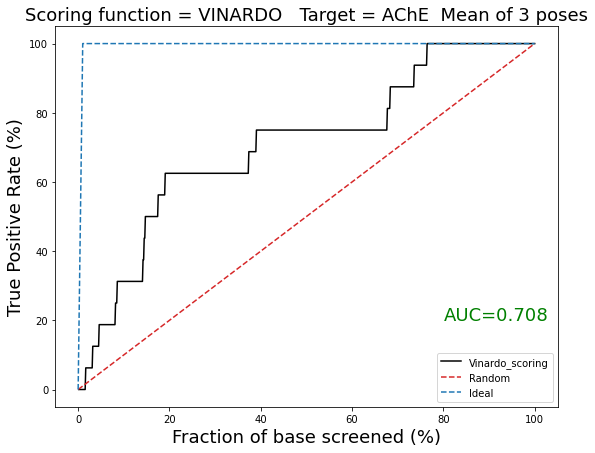

In [16]:
# CURVA ROC = Fração docada x Fração positiva
fig = plt.figure(figsize=(9,7))
plt.plot(vinardo_ache['FracDocada']*100, vinardo_ache['FracPositivos']*100, color='black', label='Vinardo_scoring')
plt.xlabel('Fraction of base screened (%)', fontsize=18)
plt.ylabel('True Positive Rate (%)',fontsize=18)
plt.title('Scoring function = VINARDO   Target = AChE  Mean of 3 poses',fontsize=18)
plt.plot(range(101),range(101),'--',color='tab:red', label='Random')
plt.plot(range(101), [0,*np.ones(100)*100],'--',color='tab:blue', label= 'Ideal')
x = vinardo_ache['FracDocada']
y = vinardo_ache['FracPositivos']
auc = round(np.trapz(y,x), 3)
plt.legend()
plt.text(80, 20, 'AUC='+str(auc), fontsize=18, color='green')
plt.savefig('ROC curve percent scale(Vinardo-3)', dpi=150, facecolor='white')
plt.show()

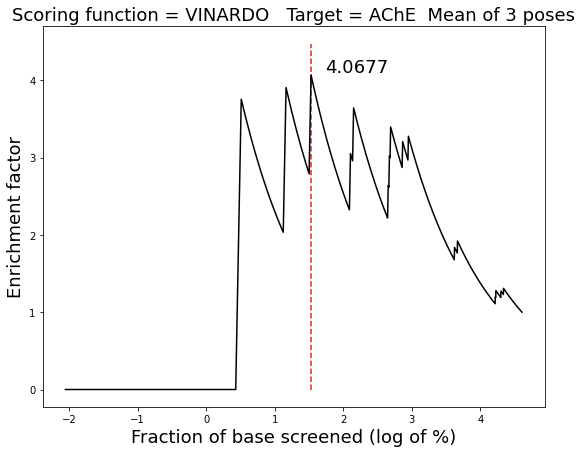

In [18]:
# CURVA ROC = Fração docada x Fração positiva escala logaritmica
fig = plt.figure(figsize=(9,7))
ymax = vinardo_ache['Fator Enquecimento'].max()
xmax = np.log(100*float(vinardo_ache.loc[vinardo_ache['Fator Enquecimento']==ymax, 'FracDocada']))
plt.plot(np.log(vinardo_ache['FracDocada']*100),vinardo_ache['Fator Enquecimento'], color='black')
plt.text(xmax+0.2,ymax*1.01,str(ymax), fontsize=18)
plt.vlines(x=xmax, ymin=0, ymax=ymax*1.1,linestyles='--',color='tab:red') #Comentar tira a linha
plt.xlabel('Fraction of base screened (log of %)', fontsize=18)
plt.ylabel('Enrichment factor',fontsize=18)
plt.title('Scoring function = VINARDO   Target = AChE  Mean of 3 poses',fontsize=18)
plt.savefig('Enricheciment curve log scale(Vinardo-3)', dpi=150, facecolor='white')
#plt.legend(loc='lower right')
plt.show()